In [2]:
pwd

'/root/Arghya_scripts/Time_series_analysis'

In [3]:
import numpy as np
import pandas as pd

In [4]:
import os

In [5]:
os.getcwd()

'/root/Arghya_scripts/Time_series_analysis'

In [5]:
import matplotlib.pylab as plt

In [6]:
%matplotlib inline

In [7]:
from matplotlib.pylab import rcParams

In [8]:
rcParams["figure.figsize"] = 10,6

In [9]:
dataset = pd.read_csv("/root/Arghya_scripts/Time_series_analysis/AirPassengers.csv")

In [10]:
dataset.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [11]:
dataset.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [12]:
dataset.dtypes

Month          object
#Passengers     int64
dtype: object

In [13]:
dataset["Month"] = pd.to_datetime(dataset["Month"],infer_datetime_format=True)

In [14]:
indexedDataset = dataset.set_index(["Month"])

In [15]:
from datetime import datetime

In [16]:
indexedDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
indexedDataset.tail(5)

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [18]:
len(indexedDataset)

144

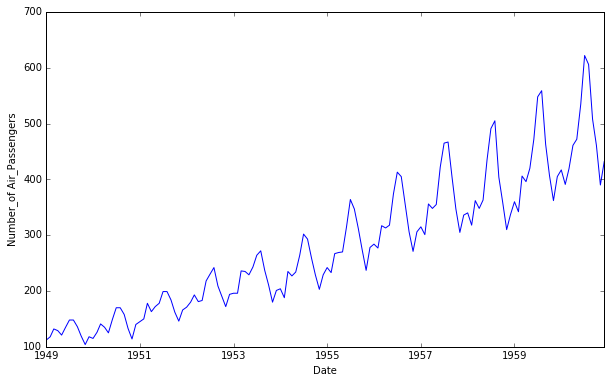

In [19]:
#plot graph
plt.xlabel("Date")
plt.ylabel("Number_of Air_Passengers")
plt.plot(indexedDataset)

In [28]:
#data is non stationary since the mean is not constant and there is a presence of upward trend in the time series

In [29]:
#checking our hypothesis using the rolling w2window or mo0ving average approach 

In [20]:
rolmean = indexedDataset.rolling(window=12).mean()

#window taken  is a window of 12 months 

In [21]:
rolstddeviation = indexedDataset.rolling(window=12).std()

In [22]:
rolmean.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [23]:
rolstddeviation.head(15)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


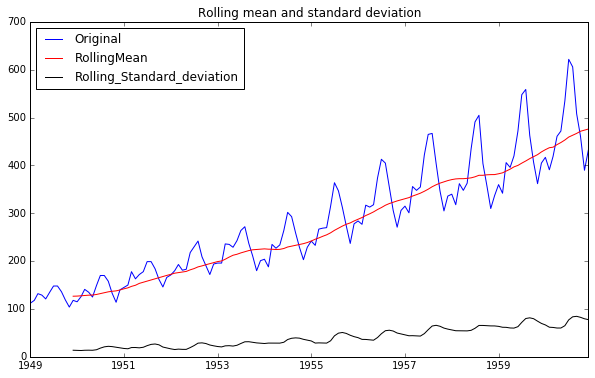

In [24]:
#plot the rolling statistics
orig = plt.plot(indexedDataset,color = "blue",label = "Original")
mean = plt.plot(rolmean,color = "red",label = "RollingMean")
std = plt.plot(rolstddeviation,color = "black",label = "Rolling_Standard_deviation")
plt.legend(loc = "best")
plt.title("Rolling mean and standard deviation")
plt.show(block = False)           

In [39]:
#w we can see that the mean and the rolling standard devciation is not constant
# we can also try the augmented dickeky fuller test to check that whether our time series data is stationary or not 


In [45]:
!pip3 install statsmodels --upgrade



    100% |████████████████████████████████| 7.3MB 6.4MB/s 
  Found existing installation: statsmodels 0.6.1
    Uninstalling statsmodels-0.6.1:
      Successfully uninstalled statsmodels-0.6.1
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [47]:
!pip3 install pytest

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [25]:
#augemented dickey fuller test
#null hypothesis is that the times series data is not stationary
from  statsmodels.tsa.stattools import adfuller

In [27]:
print("Results of dickey fuller test:")
dftest = adfuller(indexedDataset["#Passengers"],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index = ["Test Statistics" , "p-value", "#Lags Used", "Number of observations used"])
for key,value in dftest[4].items():
    dfoutput["critical value (%s)"%key] = value
    
print(dfoutput)    

Results of dickey fuller test:
Test Statistics                  0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of observations used    130.000000
critical value (5%)             -2.884042
critical value (10%)            -2.578770
critical value (1%)             -3.481682
dtype: float64


In [28]:
# #null hypothesis says that your pvalue should be always less than the test statistics you have used 
# Test Statistics                  0.815369
# p-value                          0.991880

In [29]:
# here we cannot REJECT THE NULL HYPOTHESIS
# THUS WE ACCEPT THE NULL HPOTHESIS WHICH MEANS THAT THE TS IS NOT STATIONARY

In [30]:
# NEXtSTEP WILL BE TO MAKE THE DATA  OF THE TIME SERIES STATIONARY  AND DELETE ALL THE CAUSES WHICH  MAKES THE TIME SERIES STATIONARY
#WE HAVE TO ESTIMATE TREND,SEASONALITY,NOISE AND CYCLICITY IN THE TIME SERIES DATA

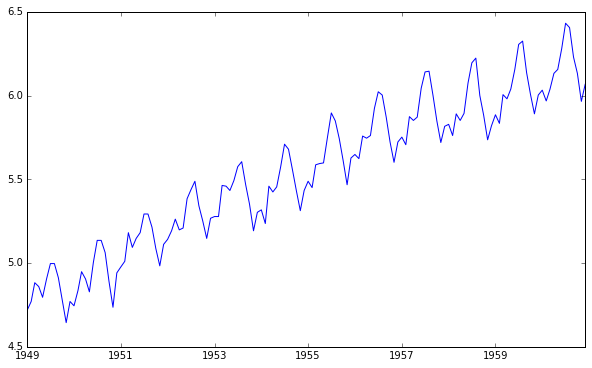

In [34]:
#estimating the trend in  time series data
indexedDataset_logscale = np.log(indexedDataset)
plt.plot(indexedDataset_logscale)

In [ ]:
#indexed dataset is nothing which has index as time   

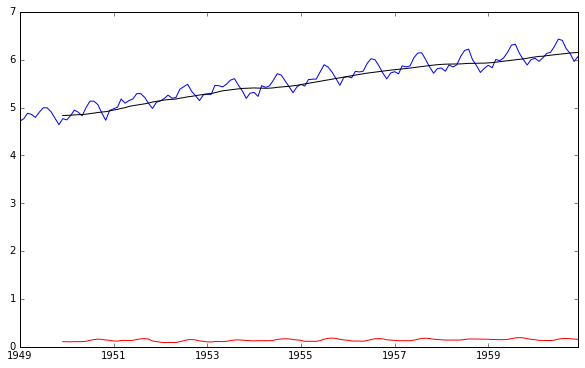

In [37]:
# calculating the moving average of the log time series 
# just to check whether theie is trend in the time series 
movingAverage = indexedDataset_logscale.rolling(window=12).mean()
movingSTD = indexedDataset_logscale.rolling(window=12).std()
plt.plot(indexedDataset_logscale,color = "blue")
plt.plot(movingSTD,color = "red")
plt.plot(movingAverage,color = "black")

In [38]:
#here we can see that the data is not stationary but the mmoving average mean is moving width time 
#now we will see the difference between the moving_average  and the actual number of passengers
#we are doing these transformations  to make the time series stationary


In [42]:
datasetLogScaleMinusmovingAverage = indexedDataset_logscale - movingAverage
datasetLogScaleMinusmovingAverage.head(14)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [43]:
#remove NAN values
datasetLogScaleMinusmovingAverage.dropna(inplace=True)
datasetLogScaleMinusmovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [44]:
# after normalising(to remove the trend  )the data  by subtracting the moving average from the logarithmic scaling of the data we are again going to check whether the 
# stationarity exists in our scaled data 
# we will be using the rolling mean and moving average and the augemented Dickey fuller test with its statistics toi see whether 
#the scale dtime series is stationary or not.

In [54]:
def testStationarity(timeseries):
    #determining the rolling statistics
    movingAverage = timeseries.rolling(window = 12).mean()
    movingSTD = timeseries.rolling(window = 12).std()
    
    #plotting the rolling statistics
    orig = plt.plot(timeseries,color = "blue",label = "Original")
    mean = plt.plot(movingAverage,color = "black",label = "Rolling_mean")
    std = plt.plot(movingSTD,color = "red",label= "Rolling_std")
    plt.legend(loc = "best")
    plt.title("Rolling mean and standard deviation")
    plt.show(block=False)
    
    
    #perform the dickey fuller test
    print("Results of dickey fuller test")
    dftest = adfuller(timeseries["#Passengers"],autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4],index = ["Test statistics","pvalue","#lags used","Number of obsercations used"])
    for key,value in dftest[4].items():
        dfoutput["Critical_Value (%s)" %key] = value
    print(dfoutput)    
    

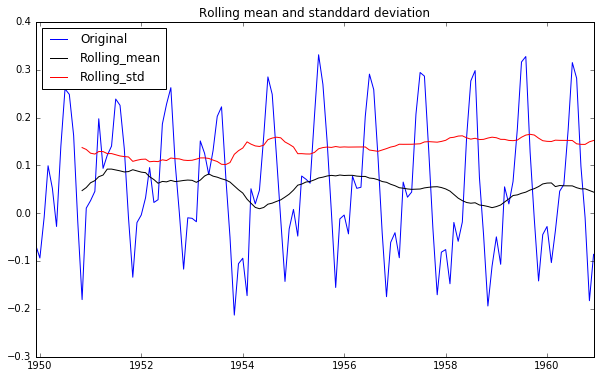

Results of dickey fuller test
Test statistics                 -3.162908
pvalue                           0.022235
#lags used                      13.000000
Number of obsercations used    119.000000
Critical_Value (5%)             -2.886151
Critical_Value (10%)            -2.579896
Critical_Value (1%)             -3.486535
dtype: float64


In [46]:
testStationarity(datasetLogScaleMinusmovingAverage)

In [47]:
#we can see that the p value has decreased a lot
#next we can see that the critical values at different intervals are almost same to the Test statistics
#thus we can confer that our process of normalizing the data by taking the difference of the logarithmic scaled version of the data
#and the moving average has helped in achieving the objective of diminishing theon  stationarity of the data 
#thus making the time series data stationary


In [ ]:
#next we need to see the weighted average of the time series to see if trend is still present in thbe time series data
#exponentialdecay Weighted Average

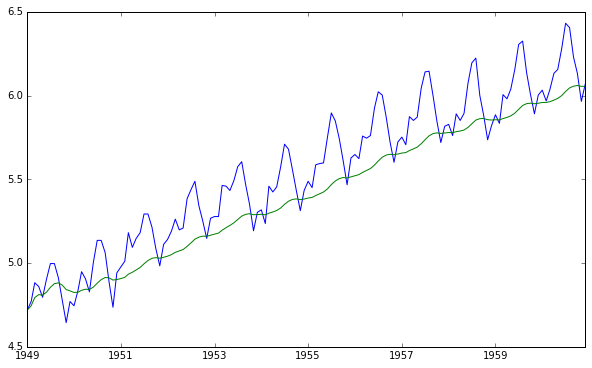

In [51]:
# we are going to make the time series data more stationary by using weighted averages for smoothning the data
# so that all the peaks and troughs are normalised 
exponentialDecayWeightedAverage = indexedDataset_logscale.ewm(halflife=12,min_periods=0,adjust = True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(exponentialDecayWeightedAverage)
# expoinential weighted average gives weights to values such that there is an exponential decrease in the weights of
#the past values so that the newer data is given more preferences exponentially.
#example if we have 4 values each relating to time periods as 
#v(t-2),v(t-1),v(t+1),v(t+2)
#with v(t+2) being the last weight, according to exponential moving average if the primary weight is w, then the weight terms will be
#w^0,w^1,w^2,w^3



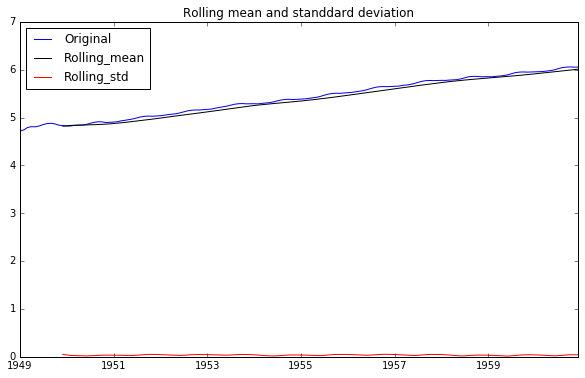

Results of dickey fuller test
Test statistics                 -2.148248
pvalue                           0.225561
#lags used                      14.000000
Number of obsercations used    129.000000
Critical_Value (5%)             -2.884219
Critical_Value (10%)            -2.578864
Critical_Value (1%)             -3.482088
dtype: float64


In [52]:
testStationarity(exponentialDecayWeightedAverage)


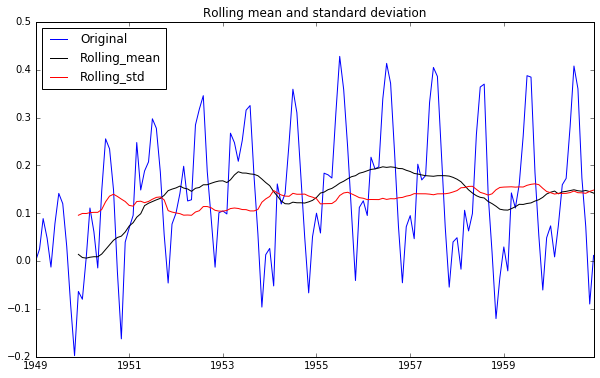

Results of dickey fuller test
Test statistics                 -3.601262
pvalue                           0.005737
#lags used                      13.000000
Number of obsercations used    130.000000
Critical_Value (5%)             -2.884042
Critical_Value (10%)            -2.578770
Critical_Value (1%)             -3.481682
dtype: float64


In [55]:
datasetLogScaleMinusMovingAverageExponentialDecayAverage = indexedDataset_logscale - exponentialDecayWeightedAverage
testStationarity(datasetLogScaleMinusMovingAverageExponentialDecayAverage)

In [56]:
# we infer that using the datasetLogScaleMinusMovingAverageExponentialDecayAverage we reach  a better stationarity in our data than  
#exponentialDecayWeightedAverage since our mean and standard deviation (rolling) are almost stable with time flow 
#also with dickey fuller test we can see thaty our p value has decreased significantly and the critical values are almost equal to our p values 


In [57]:
# we will be using this stationary(to a good degree) for forecasting
#next step is to convert the data into a time series so that we can use thee data for forecasting 
indexedDataset_logscale.head()

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


In [58]:
indexedDataset_logscale_shift = indexedDataset_logscale.shift()

In [59]:
indexedDataset_logscale_shift.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,4.718499
1949-03-01,4.770685
1949-04-01,4.882802
1949-05-01,4.859812


In [60]:
datasetLogDiffshifting = indexedDataset_logscale - indexedDataset_logscale_shift

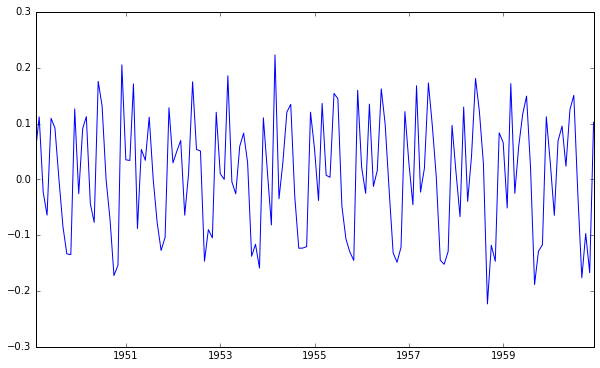

In [61]:
plt.plot(datasetLogDiffshifting)

In [62]:
datasetLogDiffshifting.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022


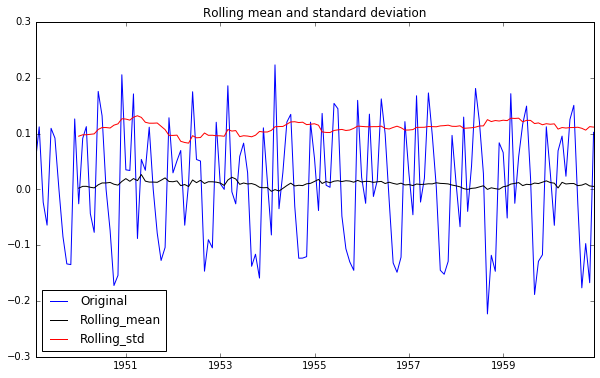

Results of dickey fuller test
Test statistics                 -2.717131
pvalue                           0.071121
#lags used                      14.000000
Number of obsercations used    128.000000
Critical_Value (5%)             -2.884398
Critical_Value (10%)            -2.578960
Critical_Value (1%)             -3.482501
dtype: float64


In [63]:
#the series has been converted into a  ts dataset
#need to remove na values
datasetLogDiffshifting.dropna(inplace = True)
testStationarity(datasetLogDiffshifting)

In [64]:
#time series passes both the rolling mean, rolling standard deviation  being stable and the aiugmented dickey fuller test.
#we will be rejecting the null hypothesis
#next step will be breaking the time series into its components
#and then trfy forecasting for a  specified time period using ARIMA model


In [66]:
from  statsmodels.tsa.seasonal import seasonal_decompose

In [67]:
#breaking the time series into trend,seasonality and residuals


In [68]:
decomposition  = seasonal_decompose(indexedDataset_logscale)

In [69]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

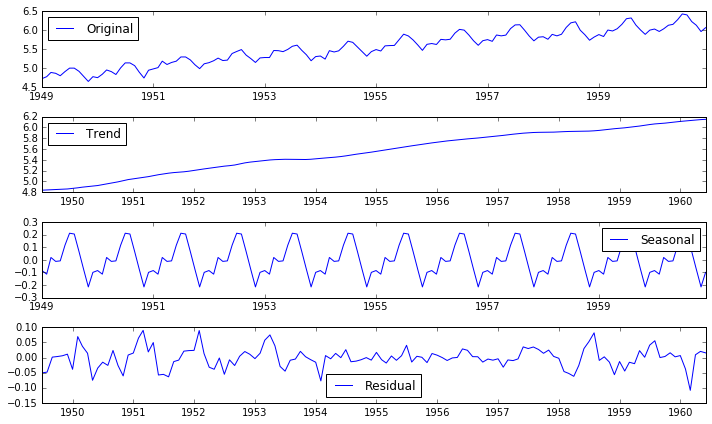

In [71]:
plt.subplot(411)
#means the total plots will be of 4 rows and 1 column with the 3rd parameter giving the number of sequence the subplot will bve assigned
plt.plot(indexedDataset_logscale,label = "Original")
plt.legend(loc = "best")
plt.subplot(412)
plt.plot(trend,label = "Trend")
plt.legend(loc = "best")
plt.subplot(413)
plt.plot(seasonal,label = "Seasonal")
plt.legend(loc = "best")
plt.subplot(414)
plt.plot(residual,label = "Residual")
plt.legend(loc = "best")
plt.tight_layout()


In [72]:
#residual is the short termed unpredictable component left in  the time series data after removing the trend and sesasonality 

In [74]:
#checking whether the noise or redisual is stationary in  nature or not

decomposedLogdata = residual

In [76]:
decomposedLogdata.head(15)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,-0.050884
1949-08-01,-0.048415
1949-09-01,0.001223


In [77]:
decomposedLogdata.dropna(inplace = True)

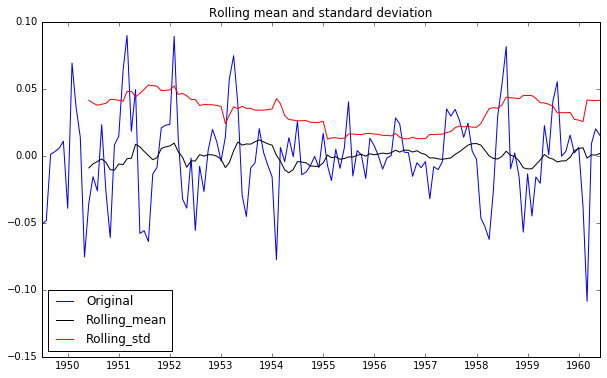

Results of dickey fuller test
Test statistics               -6.332387e+00
pvalue                         2.885059e-08
#lags used                     9.000000e+00
Number of obsercations used    1.220000e+02
Critical_Value (5%)           -2.885538e+00
Critical_Value (10%)          -2.579569e+00
Critical_Value (1%)           -3.485122e+00
dtype: float64


In [78]:
testStationarity(decomposedLogdata)

In [79]:
# we will be forecasting the time series data using the ARIMA model
#there are three values which are involved in  time series forecasting using ARIMA
#P,D,Q
#1)P = PERIODS to lag (eg :- if P=3 then we will be using three previous periods of our time series for autoregressive portion of calculation)
#p generally predicts the component of trend and sesasonaility
#if P=3 means we will be using three previous periods to forecast the current period in our series  using   autoregressive technique
#p helps adjust the line of  that is fitted to foirecast the series
#2)D =  In an ARIMA model  we transform  a time series into a  stationary one (series without trend and seasonality) using differencing.
#D refers to the number of transformations required by the initial data to convert/transform  from  non-stationary to stationary.
#stationary series means the mean and the variance are constant through time 
#3)Q DENOTES THE lag of error component, WHERE THE ERROR NCOMPONENT is a part of the time series not explained by trend and seasonality 


In [81]:
# in  order to calculate the value of p we need to plot the pacf graph
#in order to calculate the value of q we need to plot the acf graph
#plotting t]he graphs

from  statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(datasetLogDiffshifting,nlags = 20)
lag_pacf = pacf(datasetLogDiffshifting,nlags=20,method = "ols")



In [82]:
# we need both autocorelation and partial autocorelation in our time sereis forecasting using ARIMA cause 
#1)autocorelation is basically predicting how the time series data is moving/shaping/projecting with different lags of itself 
#it takes into consideration how the time series is behaving with its past projections based on the given lags
#it is used to get the q value for the moving average component in ARIMA model

#2)while the partial autocoralation shows the autoregressive part shows how the time series at a particular time is dependent on
#another time component irrespective of other data in different phases of time. 

#partial autocorelation gives the corelation   of a  time series with its own  lagged values,controlling for the values of the time series
#at all shorter lags
#autocorelation doesnot control for all other lags 


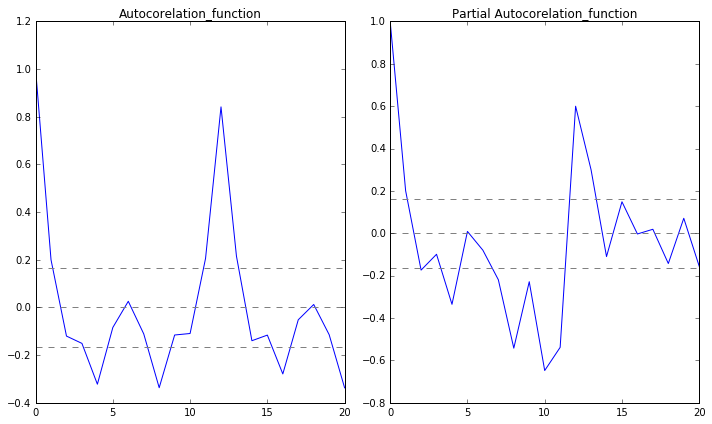

In [83]:
#plotting the pacf and acf plots 
#acf graph (autocorelation infers the q values)
plt.subplot(121)  #subplot consisting of one row and two columns 
plt.plot(lag_acf)
plt.axhline(y =0 , linestyle = "--" , color = "gray")
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffshifting)),linestyle = "--" , color = "gray")
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffshifting)),linestyle = "--",color = "gray")
plt.title("Autocorelation_function")

#pacf graph  (partial   autocorelation  infers the p values)
plt.subplot(122)  #subplot consisting of one row and two columns 
plt.plot(lag_pacf)
plt.axhline(y =0 , linestyle = "--" , color = "gray")
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffshifting)),linestyle = "--" , color = "gray")
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffshifting)),linestyle = "--",color = "gray")
plt.title("Partial Autocorelation_function")
plt.tight_layout()

In [84]:
#how to infer the p value and the q values through the plotted pcaf and the acf graphs
#since both y values touches zero at x= 2 , so p=2 and q=2 for out data


In [85]:
#values for Arima MODEL
#p = partial autocorelation = 2
#d = diferecing = degress of transofrmation  for achieving  stationarity = 1
#q = auto corelation = 2
# we will be plugging in these values in  our bARIMA model for forecasting  

/root/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/root/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR models


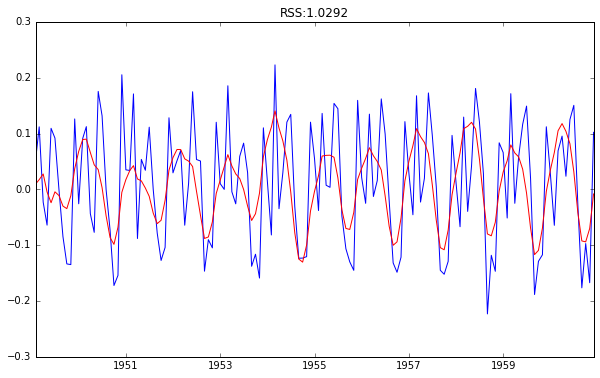

In [86]:
from statsmodels.tsa.arima_model import ARIMA

#AR model 
model = ARIMA(indexedDataset_logscale,order = (2,1,2))
results_AR = model.fit(disp = -1)
plt.plot(datasetLogDiffshifting)
plt.plot(results_AR.fittedvalues,color = "red")
plt.title('RSS:%.4f'% sum((results_AR.fittedvalues - datasetLogDiffshifting["#Passengers"])**2))
print("Plotting AR models")

/root/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/root/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


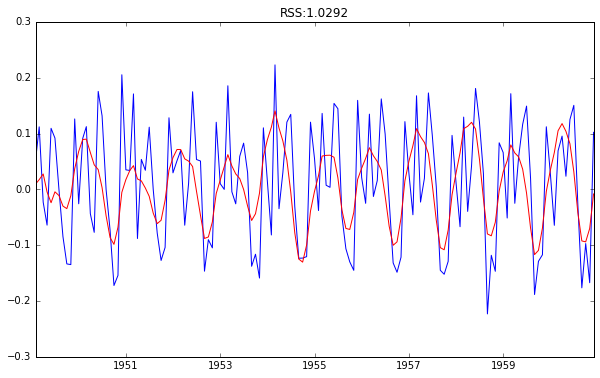

In [88]:
#the greater the rss the bad it is for you 
#final  ARIMA model
model  = ARIMA(indexedDataset_logscale, order = (2,1,2))
results_ARIMA = model.fit(disp = -1)
plt.plot(datasetLogDiffshifting)
plt.plot(results_ARIMA.fittedvalues,color = "red")
plt.title('RSS:%.4f'% sum((results_ARIMA.fittedvalues - datasetLogDiffshifting["#Passengers"])**2))


In [ ]:
#RSS has been reduced to 1.02
#now tiime for fittings or predictions 

In [89]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy = True)
print(predictions_ARIMA_diff.head(5))

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [90]:
#converting to cumulative sum 
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [92]:
predictions_ARIMA_log = pd.Series(indexedDataset_logscale['#Passengers'].ix[0],index= indexedDataset_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value = 0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

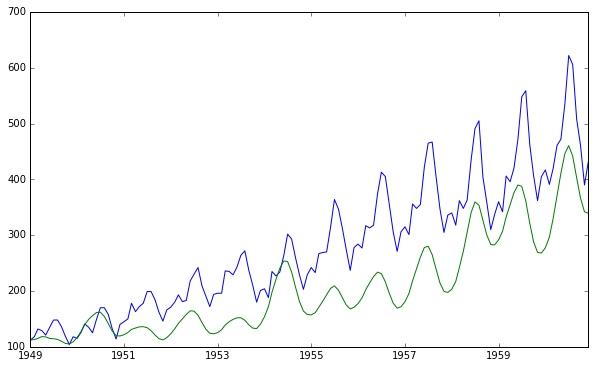

In [94]:
# we will be plotting the actual   and the predicted value
predictions_ARIMA = np.exp(predictions_ARIMA_log) #taking the exponent of the data since we have to go back to the original data from which we did logarithmic transformation
plt.plot(indexedDataset , color = "blue")
plt.plot(predictions_ARIMA , color = "green")

In [97]:
len(indexedDataset_logscale)

144

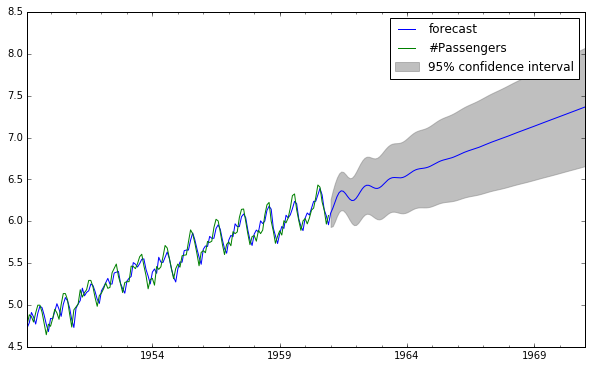

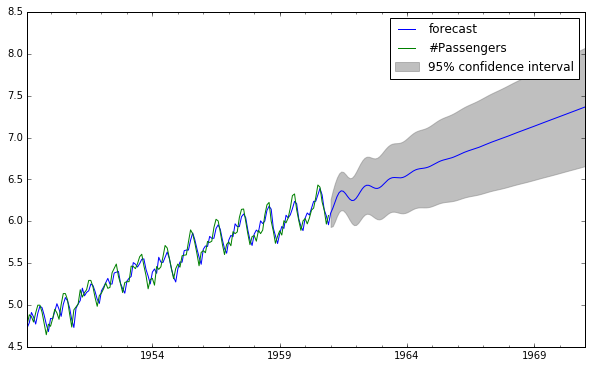

In [98]:
#  lets predict the data for the next 10 years , the number of  datapoints will be 120
#each year contributing 12 datapoints
#currently i  am having 144 rows in  our time series data
#gonna predict for the next `10 years
#[1:264]
results_ARIMA.plot_predict(1,264)

In [100]:
#predictions in  value for the next 10 years
forecast = results_ARIMA.forecast(steps=120)

In [103]:
forecast

(array([6.09553366, 6.15281365, 6.22442934, 6.29241089, 6.34164729,
        6.36359396, 6.3578473 , 6.33139343, 6.29597561, 6.26447709,
        6.24738297, 6.25025126, 6.27275788, 6.30940273, 6.35151474,
        6.38988659, 6.41727403, 6.43011083, 6.42906714, 6.41842498,
        6.40456142, 6.3940358 , 6.39183031, 6.40019446, 6.4183364 ,
        6.4429537 , 6.46937416, 6.49293983, 6.51024126, 6.51989041,
        6.52267577, 6.5211237 , 6.51864491, 6.51853638, 6.52311863,
        6.533223  , 6.54812816, 6.56591516, 6.5841028 , 6.60036521,
        6.61313252, 6.62192763, 6.62737762, 6.6309309 , 6.63438638,
        6.63937924, 6.64696439, 6.65739777, 6.67015267, 6.68414201,
        6.69806584, 6.71077864, 6.72157696, 6.73033944, 6.73749763,
        6.74386322, 6.75037259, 6.75782523, 6.7666861 , 6.77699753,
        6.78841253, 6.80032792, 6.81207137, 6.82308705, 6.8330708 ,
        6.84202433, 6.85022247, 6.8581115 , 6.86617264, 6.87479072,
        6.88416222, 6.89426304, 6.90487812, 6.91

In [104]:
# we have forecasted the data for the next 10 years